In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [89]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm   # распределение хи-квадрат и нормальное распределение

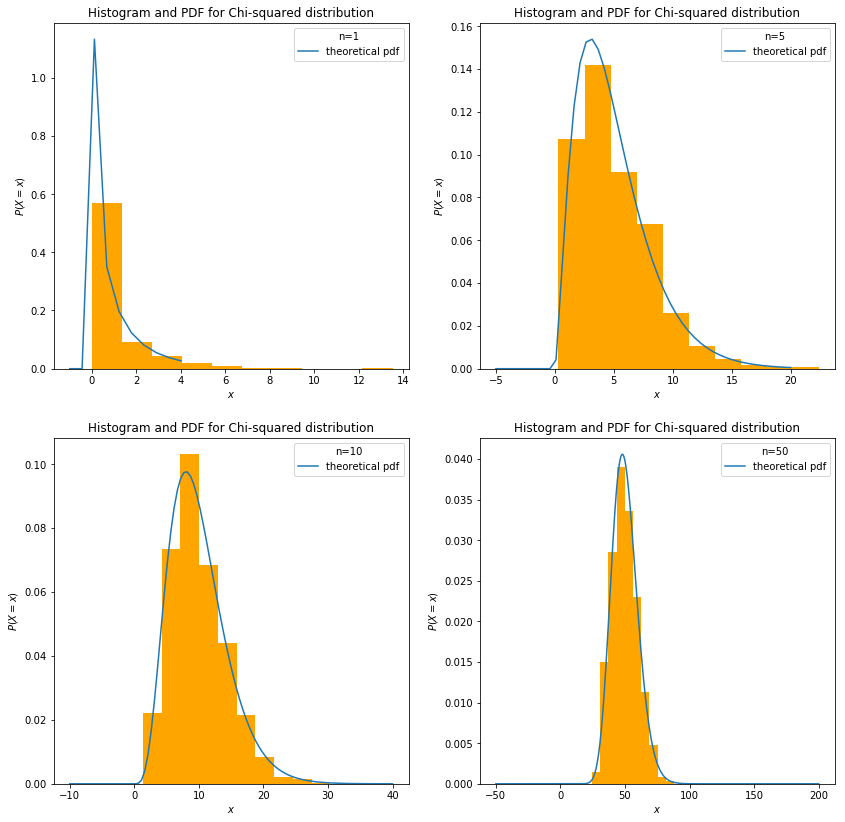

In [103]:
fig = plt.figure(figsize=(14,14))    # создаем контейнер для графиков размером 14х14
n = [1, 5, 10, 50]                   # значения объема выборок n 

for i in range(4):        # в цикле генерируем выборку, строим гистограммы выборки, рисуем теоретическую плотность распределения
    x = np.linspace(-1*n[i],4*n[i],10*n[i])  # генерируем равномерную выборку на заданном интервале
    rv = chi2(n[i])                          # выборка объема n для распределения хи-квадрат
    sample = rv.rvs(1000)                    # генерируем 1000 выборок объема n
    pdf = rv.pdf(x)                          # считаем плотности  распределения
    ax = fig.add_subplot(2,2,i+1)            # в цикле создается 4 графика (расположение графиков: 2х2) в одном контейнере
    plt.hist(sample, normed=True, color='orange')        # строим гистограмму выборки
    plt.plot(x, pdf, label='theoretical pdf')            # рисуем график теоретической плотности распределения
    
    plt.legend(title='n=%s' % n[i], loc='best')                  # добавляем легенду на графики
    plt.title("Histogram and PDF for Chi-squared distribution")  # подписываем графики
    plt.ylabel('$P(X=x)$')                                       # подписываем ось Y
    plt.xlabel('$x$')                                            # подписываем ось X

plt.show()

Для распределения хи-квадрат $\mu$ = n - мат.ожидание;  $\sigma^2$ = 2*n - дисперсия. Построим нормальное распределение со значениями дисперсии и среднего из распределения хи-квадрат и сравним

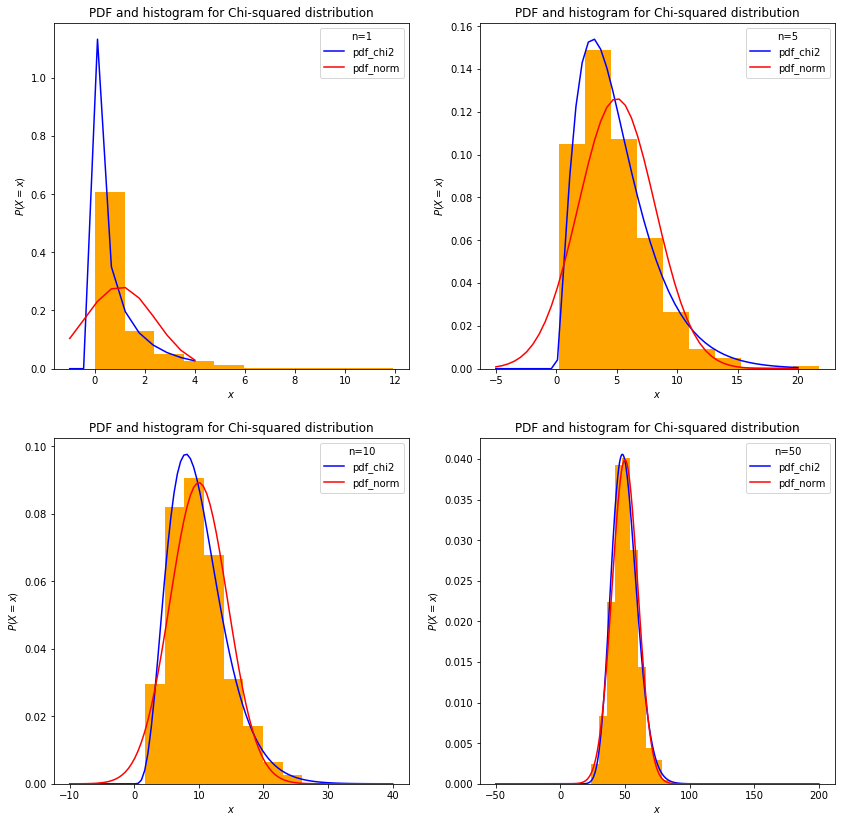

In [101]:
fig = plt.figure(figsize=(14,14))    # создаем контейнер для графиков размером 14х14
n = [1, 5, 10, 50]                   # значения объема выборок n 

for i in range(4):        # в цикле генерируем выборку, строим гистограммы выборки, рисуем теоретическую плотность распределения
    x = np.linspace(-1*n[i],4*n[i],10*n[i])               # генерируем равномерную выборку на заданном интервале
    rv = chi2(n[i])                                       # выборка объема n для распределения хи-квадрат
    sample = rv.rvs(1000)                                 # генерируем 1000 выборок объема n
    pdf_chi2 = rv.pdf(x)                                  # считаем плотности распределения хи-квадрат
    norm_rv = sts.norm(loc=n[i], scale=math.sqrt(2*n[i])) # расчет нормального распределения с характеристиками распр. хи-квадрат
    pdf_norm = norm_rv.pdf(x)

    ax = fig.add_subplot(2,2,i+1)    # в цикле создается 4 графика (расположение графиков: 2х2) в одном контейнере
    plt.hist(sample, normed=True, color='orange')             # строим гистограмму выборки
    plt.plot(x, pdf_chi2, label='pdf_chi2', color='blue')     # рисуем график теоретической плотности распределения
    plt.plot(x, pdf_norm, label="pdf_norm", color='red')      # рисуем график нормального распределения
    
    plt.legend(title="n=%s" % n[i], loc='best')                             # добавляем легенду на графики
    plt.title("Histogram and PDF for Chi-squared VS Normal distributions")  # подписываем графики
    plt.ylabel('$P(X=x)$')                                                  # подписываем ось Y
    plt.xlabel('$x$')                                                       # подписываем ось X

plt.show()

Сравнивая графики нормального распределения и распределения хи-квадрат, можно сказать что чем больше объем выборки n, тем ближе распределение хи-квадрат похоже на нормальное распределение